<a href="https://colab.research.google.com/github/kourosh89/Image-Segmentation-Skin/blob/main/Githab_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, shutil, cv2
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout

In [ ]:
# Download Dataset
!wget https://uwaterloo.ca/vision-image-processing-lab/sites/ca.vision-image-processing-lab/files/uploads/files/skin_image_data_set-1.zip
!wget https://uwaterloo.ca/vision-image-processing-lab/sites/ca.vision-image-processing-lab/files/uploads/files/skin_image_data_set-2.zip

--2023-03-16 04:00:04--  https://uwaterloo.ca/vision-image-processing-lab/sites/ca.vision-image-processing-lab/files/uploads/files/skin_image_data_set-1.zip
Resolving uwaterloo.ca (uwaterloo.ca)... 151.101.194.133, 151.101.66.133, 151.101.2.133, ...
Connecting to uwaterloo.ca (uwaterloo.ca)|151.101.194.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17354586 (17M) [application/zip]
Saving to: ‘skin_image_data_set-1.zip’

skin_image_data_set 100%[===================>]  16.55M  4.10MB/s    in 4.1s    

2023-03-16 04:00:09 (4.05 MB/s) - ‘skin_image_data_set-1.zip’ saved [17354586/17354586]

--2023-03-16 04:00:09--  https://uwaterloo.ca/vision-image-processing-lab/sites/ca.vision-image-processing-lab/files/uploads/files/skin_image_data_set-2.zip
Resolving uwaterloo.ca (uwaterloo.ca)... 151.101.194.133, 151.101.66.133, 151.101.2.133, ...
Connecting to uwaterloo.ca (uwaterloo.ca)|151.101.194.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

these are two different link to get data as zip files. wee need to extract data from those zip files

In [ ]:
! unzip '/content/skin_image_data_set-1.zip'
! unzip '/content/skin_image_data_set-2.zip'

Archive:  /content/skin_image_data_set-1.zip
   creating: Skin Image Data Set-1/
   creating: Skin Image Data Set-1/skin_data/
   creating: Skin Image Data Set-1/skin_data/melanoma/
   creating: Skin Image Data Set-1/skin_data/melanoma/dermIS/
 extracting: Skin Image Data Set-1/skin_data/melanoma/dermIS/AMM1_contour.png  
  inflating: Skin Image Data Set-1/skin_data/melanoma/dermIS/AMM1_orig.jpg  
 extracting: Skin Image Data Set-1/skin_data/melanoma/dermIS/LMM1_contour.png  
  inflating: Skin Image Data Set-1/skin_data/melanoma/dermIS/LMM1_orig.jpg  
 extracting: Skin Image Data Set-1/skin_data/melanoma/dermIS/LMM2_contour.png  
  inflating: Skin Image Data Set-1/skin_data/melanoma/dermIS/LMM2_orig.jpg  
 extracting: Skin Image Data Set-1/skin_data/melanoma/dermIS/LMM4_contour.png  
  inflating: Skin Image Data Set-1/skin_data/melanoma/dermIS/LMM4_orig.jpg  
 extracting: Skin Image Data Set-1/skin_data/melanoma/dermIS/LMM5_contour.png  
  inflating: Skin Image Data Set-1/skin_data/mel

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.mkdir('/content/final_folder')

we should notice that when we make copy any directory and put it in string variable, we need to add / at the end of that directory to use it for our purpose

In [ ]:
d1 = '/content/Skin Image Data Set-1/skin_data/melanoma/dermIS/'
d2 = '/content/Skin Image Data Set-1/skin_data/melanoma/dermquest/'
d3 = '/content/Skin Image Data Set-2/skin_data/notmelanoma/dermis/'
d4 = '/content/Skin Image Data Set-2/skin_data/notmelanoma/dermquest/'
d_main = '/content/final_folder/'

In [ ]:
list_d1 = os.listdir(d1)
list_d2 = os.listdir(d2)
list_d3 = os.listdir(d3)
list_d4 = os.listdir(d4)

In [ ]:
print(len(list_d1))
print(len(list_d2))
print(len(list_d3))
print(len(list_d4))

87
153
53
123


In [ ]:
a1=[i for i in list_d1 if i[-3:] not in ['jpg','png']]
a2=[i for i in list_d2 if i[-3:] not in ['jpg','png']]
a3=[i for i in list_d3 if i[-3:] not in ['jpg','png']]
a4=[i for i in list_d4 if i[-3:] not in ['jpg','png']]

In [ ]:
for i in a1:
  list_d1.remove(i)
for i in a2:
  list_d2.remove(i)
for i in a3:
  list_d3.remove(i)
for i in a4:
  list_d4.remove(i)

In [ ]:
print(len(list_d1))
print(len(list_d2))
print(len(list_d3))
print(len(list_d4))

86
152
52
122


In [ ]:
for i in sorted(list_d1):
  shutil.copy(d1+i,d_main+'L1'+i)
for i in sorted(list_d2):
  shutil.copy(d2+i,d_main+'L2'+i)
for i in sorted(list_d3):
  shutil.copy(d3+i,d_main+'L3'+i)
for i in sorted(list_d4):
  shutil.copy(d4+i,d_main+'L4'+i)

In [ ]:
list_data = sorted(os.listdir(d_main))

In [ ]:
len(list_data)

412

In [ ]:
list_data_photo = [i for i in list_data if i.find('jpg')>1]
list_data_mask = [i for i in list_data if i.find('png')>1]

In [ ]:
print(len(list_data_photo))
print(len(list_data_mask))

206
206


In [ ]:
print(list_data_photo[6])
print(list_data_mask[6])

L1NM2_orig.jpg
L1NM2_contour.png


to check total class of masks:

In [ ]:
total_pixel = []
for i in range(len(list_data_mask)):
  total_pixel.append(list(np.unique(cv2.imread(d_main+list_data_mask[0]))))

In [ ]:
np.unique(np.array(total_pixel))

array([  0, 255], dtype=uint8)

to check size of any photo

In [ ]:
dim_1 = [cv2.imread(d_main+i).shape[0] for i in list_data_photo]
dim_2 = [cv2.imread(d_main+i).shape[1] for i in list_data_photo]

In [ ]:
print('for first dim, min is {} and max is {}'.format(min(dim_1),max(dim_1)))
print('for second dim, min is {} and max is {}'.format(min(dim_2),max(dim_2)))

for first dim, min is 351 and max is 1605
for second dim, min is 356 and max is 1640


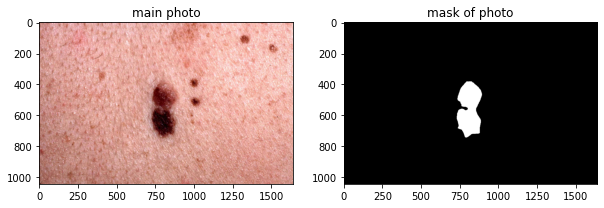

In [ ]:
number = 200
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
img0 = cv2.imread(d_main+list_data_photo[number])
img1 = cv2.cvtColor(img0 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.title('main photo')
# --------------------------------------------------
plt.subplot(1,2,2)
img0 = cv2.imread(d_main+list_data_mask[number])
img1 = cv2.cvtColor(img0 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.title('mask of photo')
plt.show()

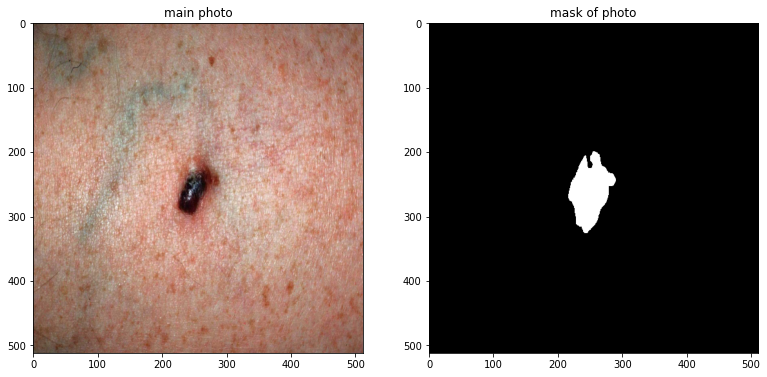

In [ ]:
#resize an sample image to size(512,512) and display it
num = 118
plt.figure(figsize = (13,16))

img0 = cv2.imread(d_main+list_data_photo[num])
img1 = cv2.cvtColor(img0 , cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img1 , (512,512) , interpolation = cv2.INTER_AREA)

plt.subplot(1,2,1)
plt.imshow(img2)
plt.title('main photo')

img0 = cv2.imread(d_main+list_data_mask[num],cv2.IMREAD_UNCHANGED)
img1 = cv2.cvtColor(img0 , cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img1 , (512,512) , interpolation = cv2.INTER_AREA)

## with two following line codes we change resized mask matrix to 0 and 1
## but, if we would have not put the two following lines, the final mask
## photo will be same mask like bellow and the values for that matrix is
## in the next code

img2[img2 !=255] = 0
img3 = img2/255  ## for musk

plt.subplot(1,2,2)
plt.imshow(img3 , cmap='gray')
plt.title('mask of photo')
plt.show()

In [ ]:
# resize all images to size=(512,512)
data_train=[]
data_mask=[]
for i in list_data_photo:
  img0 = cv2.imread(d_main+i)
  img1 = cv2.cvtColor(img0 , cv2.COLOR_BGR2RGB)
  img2 = cv2.resize(img1 , (512,512),interpolation = cv2.INTER_AREA)
  img3 = img2/255  ## for normalization
  data_train.append(img3)

for i in list_data_mask:
  img0 = cv2.imread(d_main+i ,cv2.IMREAD_UNCHANGED)
  # img1 = cv2.cvtColor(img0 , cv2.COLOR_BGR2RGB)
  img1 = cv2.resize(img0 , (512,512),interpolation = cv2.INTER_AREA)
  img1[img1 !=255] = 0
  img2 = img1/255  ## for musk
  data_mask.append(img2)

In [ ]:
print(np.array(data_train).shape)
print(np.array(data_mask).shape)

(206, 512, 512, 3)
(206, 512, 512)


In [ ]:
data_train = np.array(data_train)
data_mask = np.array(data_mask)

In [ ]:
x_train = data_train[0:140]
x_val = data_train[140:170]
x_test = data_train[170:]

y_train = data_mask[0:140]
y_val = data_mask[140:170]
y_test = data_mask[170:]

In [ ]:
#display sizeof each array
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(140, 512, 512, 3)
(30, 512, 512, 3)
(36, 512, 512, 3)
(140, 512, 512)
(30, 512, 512)
(36, 512, 512)


In [ ]:
# define UNET model for training images for segmentation
import tensorflow as tf
# import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Cropping2D,ZeroPadding2D,concatenate

num_class=2
im_sz=512
n_channels=3

def get_crop_shape(target, refer):
    # width, the 3rd dimension
    cw= (target.get_shape()[2] -refer.get_shape()[2])
    assert (cw >= 0)
    if cw % 2 != 0:
        cw1, cw2= cw //2, cw //2 + 1
    else:
        cw1, cw2= cw //2, cw //2
    # height, the 2nd dimension
    ch= (target.get_shape()[1] -refer.get_shape()[1])
    assert (ch >= 0)
    if ch % 2 != 0:
        ch1, ch2= ch //2, ch //2 + 1
    else:
        ch1, ch2= ch //2, ch //2
    return (ch1, ch2), (cw1, cw2)

def get_unet_v3_1(n_classes=2, im_sz=500, n_channels=3):
    concat_axis = 3
    inputs = tf.keras.Input((im_sz, im_sz, n_channels))

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up_conv5 = UpSampling2D(size=(2, 2))(conv5)
    ch, cw = get_crop_shape(conv4, up_conv5)
    crop_conv4 = Cropping2D(cropping=(ch, cw))(conv4)
    #using top code, I changed size of conv4 to same size of up_conv5
    up6 = concatenate([up_conv5, crop_conv4], axis=concat_axis)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up_conv6 = UpSampling2D(size=(2, 2))(conv6)
    ch, cw = get_crop_shape(conv3, up_conv6)
    crop_conv3 = Cropping2D(cropping=(ch, cw))(conv3)
    up7 = concatenate([up_conv6, crop_conv3], axis=concat_axis)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up_conv7 = UpSampling2D(size=(2, 2))(conv7)
    ch, cw = get_crop_shape(conv2, up_conv7)
    crop_conv2 = Cropping2D(cropping=(ch, cw))(conv2)
    up8 = concatenate([up_conv7, crop_conv2], axis=concat_axis)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up_conv8 = UpSampling2D(size=(2, 2))(conv8)
    ch, cw = get_crop_shape(conv1, up_conv8)
    crop_conv1 = Cropping2D(cropping=(ch, cw))(conv1)
    up9 = concatenate([up_conv8, crop_conv1], axis=concat_axis)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    ch, cw = get_crop_shape(inputs, conv9)
    conv9 = ZeroPadding2D(padding=((ch[0], ch[1]), (cw[0], cw[1])))(conv9)
    conv10 = Conv2D(n_classes, (1, 1))(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

model=get_unet_v3_1(n_classes=num_class, im_sz=im_sz, n_channels=n_channels)
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 512, 512, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  9248        ['conv1_1[0][0]']                
                                )                                                             

In [ ]:
# Train segmentation model (UNET)
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
batch_size = 8
epochs=100

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3,decay=1e-1/epochs),
              loss=loss,metrics=['accuracy'])

summary = model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val, y_val),
          callbacks=[ModelCheckpoint('model_150epoch_unet.h5', save_best_only=True)],
          shuffle = True)

Epoch 1/100
18/18 [==============================] - 15s 745ms/step - loss: 0.2845 - accuracy: 0.8914 - val_loss: 0.3013 - val_accuracy: 0.9002
Epoch 2/100
18/18 [==============================] - 13s 741ms/step - loss: 0.2689 - accuracy: 0.9013 - val_loss: 0.1715 - val_accuracy: 0.9591
Epoch 3/100
18/18 [==============================] - 13s 726ms/step - loss: 0.2408 - accuracy: 0.9131 - val_loss: 0.1393 - val_accuracy: 0.9433
Epoch 4/100
18/18 [==============================] - 13s 699ms/step - loss: 0.2326 - accuracy: 0.9195 - val_loss: 0.1564 - val_accuracy: 0.9636
Epoch 5/100
18/18 [==============================] - 12s 687ms/step - loss: 0.2485 - accuracy: 0.9246 - val_loss: 0.3080 - val_accuracy: 0.8678
Epoch 6/100
18/18 [==============================] - 12s 681ms/step - loss: 0.2424 - accuracy: 0.9098 - val_loss: 0.2357 - val_accuracy: 0.9509
Epoch 7/100
18/18 [==============================] - 13s 732ms/step - loss: 0.3041 - accuracy: 0.9066 - val_loss: 0.1285 - val_accuracy:

In [ ]:
# accuracy of trainded model on test data
model.evaluate(x_test,y_test)

2/2 [==============================] - 12s 100ms/step - loss: 0.0462 - accuracy: 0.9868


[0.04623722285032272, 0.9868136644363403]

In [ ]:
model.load_weights('model_150epoch_unet.h5')

num=20
num_class=2
temp1=x_test[num]

(512, 512, 3)
1/1 [==============================] - 0s 30ms/step


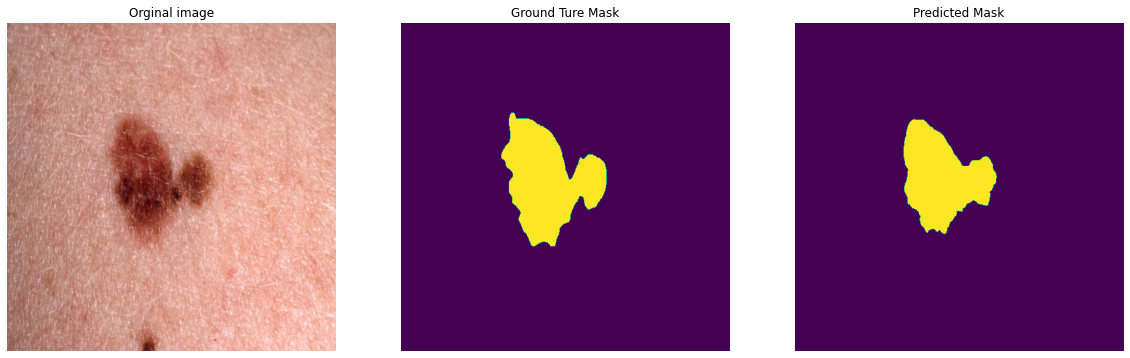

In [ ]:
# display a sample image and its Ground Ture Mask and predicted Mask with UNET

model.load_weights('model_150epoch_unet.h5')

num=20
num_class=2
temp1=x_test[num]
print(temp1.shape)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(temp1[:,:,0:3])
plt.title("Orginal image")


temp2=y_test[num]
# temp2=labelVisualize(num_class,color_dict2,temp2)
plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(temp2)
plt.title("Ground Ture Mask")

preds_test = model.predict(np.expand_dims((temp1),axis=0))
out=np.squeeze(preds_test)
y = np.argmax(out, axis=2)
# y=labelVisualize(num_class,color_dict2,y)
plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(y)
plt.title("Predicted Mask")

plt.show()

1/1 [==============================] - 0s 24ms/step


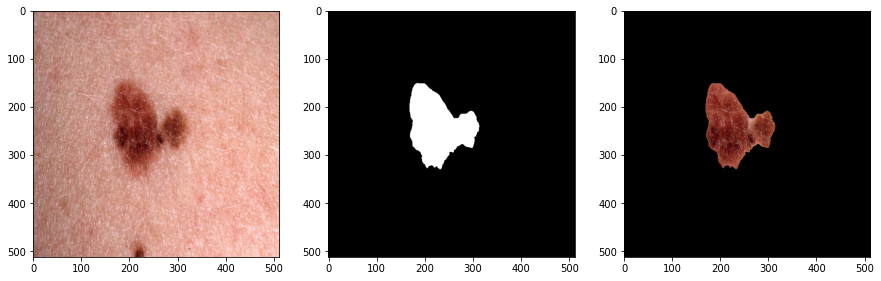

In [ ]:
#display a sample of predicted mask (region of interest)
num=20
plt.close()
plt.figure(figsize=(15,30))
plt.subplot(1,3,1)
plt.imshow(x_test[num])
plt.subplot(1,3,2)
preds_mask = model.predict(np.expand_dims((x_test[num]),axis=0))
out=np.squeeze(preds_mask)
mask = np.argmax(out, axis=2)
mask = np.stack((mask,)*3,-1)*255
plt.imshow(mask,cmap='gray')
plt.subplot(1,3,3)
X_test_roi=np.asarray(x_test[num]) * np.asarray(mask)
plt.imshow(X_test_roi/255)